<a href="https://colab.research.google.com/github/kdChen07/LSCP_kd/blob/main/map%26color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [3]:
import numpy
import geopandas 
import pandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from google.colab import files

In [16]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

In [4]:
network_distance = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/distance8816.csv?raw=ture')
demand_points = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/MSOA380.csv?raw=ture')
facility_points = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/opt_points2738.csv?raw=ture')

In [5]:
tract = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Boundary_with_population.gpkg?raw=true')
tract = tract.to_crs('epsg:4326')

In [9]:
tract

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151..."
1,E02000002,Barking and Dagenham 001,5621,835,505,401,268,105,7735,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ..."
2,E02000003,Barking and Dagenham 002,8062,1272,886,575,301,78,11174,"POLYGON ((0.14841 51.58075, 0.14978 51.56970, ..."
3,E02000004,Barking and Dagenham 003,4401,866,598,444,262,116,6687,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ..."
4,E02000005,Barking and Dagenham 004,7982,1144,629,413,211,53,10432,"POLYGON ((0.15441 51.56607, 0.14790 51.56109, ..."
...,...,...,...,...,...,...,...,...,...,...
6786,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ..."
6787,E02006931,Greenwich 038,7267,1024,672,510,255,78,9806,"POLYGON ((-0.00284 51.48251, 0.00141 51.48214,..."
6788,E02006932,Liverpool 060,16963,264,173,80,25,10,17515,"POLYGON ((-2.96793 53.41177, -2.96814 53.40874..."
6789,E02006933,Liverpool 061,7130,603,485,220,97,4,8539,"POLYGON ((-2.97760 53.39957, -2.98328 53.39717..."


In [15]:
tract['dissolve']=1
MSOA_outline = tract.dissolve(by='dissolve')

In [8]:
sum1 = pandas.read_csv('6400&1600.csv')
sum1

,origin_id,number
0,E02000001,623
1,E02000002,69
2,E02000003,68
3,E02000004,42
4,E02000005,73
...,...,...
6403,E02006930,453
6404,E02006931,516
6405,E02006932,14
6406,E02006933,13


In [12]:
tract1 = pandas.merge(left = tract,right = sum1, how='right', left_on='MSOA11CD', right_on='origin_id')
tract1

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry,origin_id,number
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151...",E02000001,623
1,E02000002,Barking and Dagenham 001,5621,835,505,401,268,105,7735,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ...",E02000002,69
2,E02000003,Barking and Dagenham 002,8062,1272,886,575,301,78,11174,"POLYGON ((0.14841 51.58075, 0.14978 51.56970, ...",E02000003,68
3,E02000004,Barking and Dagenham 003,4401,866,598,444,262,116,6687,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ...",E02000004,42
4,E02000005,Barking and Dagenham 004,7982,1144,629,413,211,53,10432,"POLYGON ((0.15441 51.56607, 0.14790 51.56109, ...",E02000005,73
...,...,...,...,...,...,...,...,...,...,...,...,...
6403,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ...",E02006930,453
6404,E02006931,Greenwich 038,7267,1024,672,510,255,78,9806,"POLYGON ((-0.00284 51.48251, 0.00141 51.48214,...",E02006931,516
6405,E02006932,Liverpool 060,16963,264,173,80,25,10,17515,"POLYGON ((-2.96793 53.41177, -2.96814 53.40874...",E02006932,14
6406,E02006933,Liverpool 061,7130,603,485,220,97,4,8539,"POLYGON ((-2.97760 53.39957, -2.98328 53.39717...",E02006933,13


In [37]:
tract12 =tract1.loc[tract1['number']<=1]
tract13 =tract1.loc[(tract1['number']>1)&(tract1['number']<=10)]
tract14 =tract1.loc[(tract1['number']>10)&(tract1['number']<=50)]
tract15 =tract1.loc[(tract1['number']>50)&(tract1['number']<=100)]
tract16 =tract1.loc[tract1['number']>100]

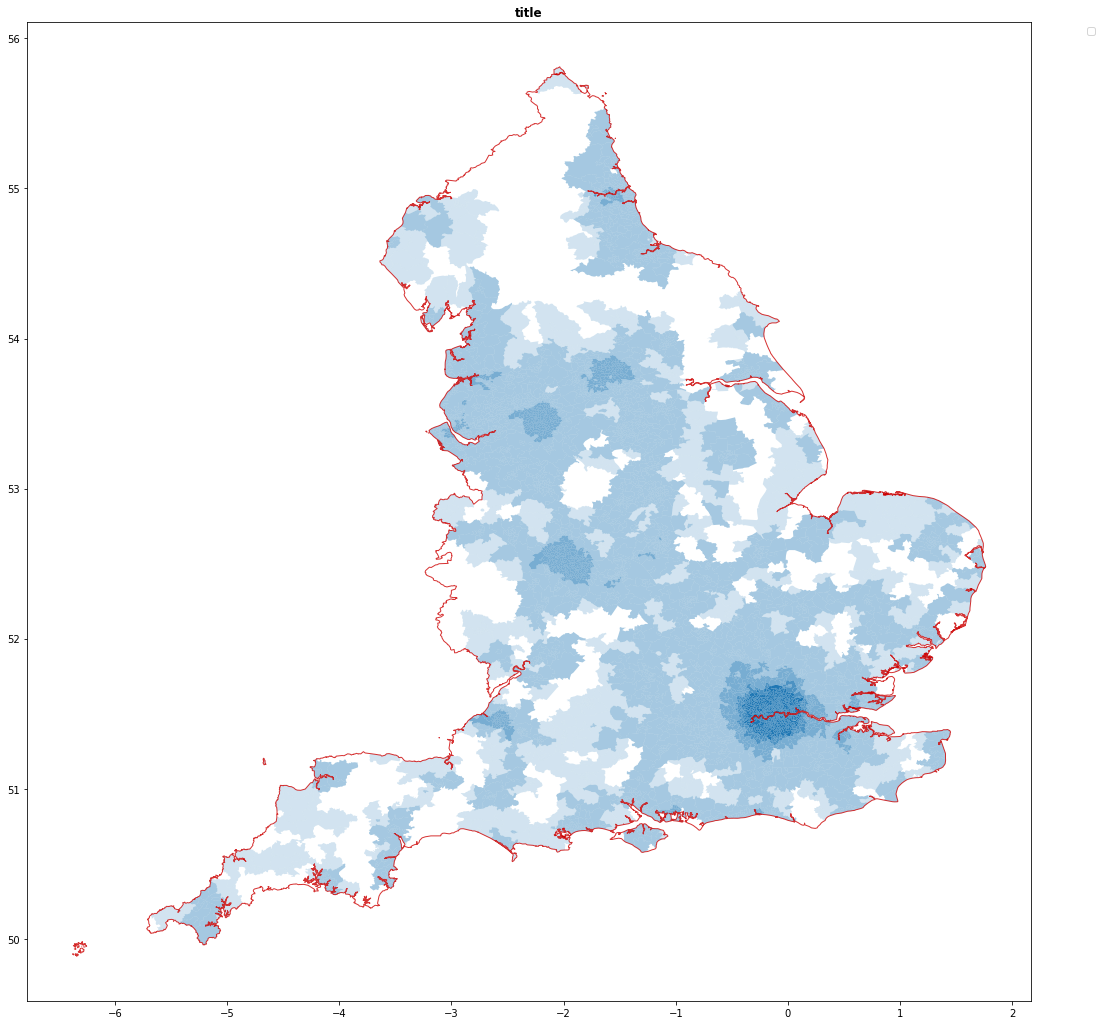

In [40]:
    fig, ax = plt.subplots(figsize=(18,18))
    legend_elements = []
    tract12.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract13.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract14.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.6)
    tract15.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.8)
    tract16.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract17.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract18.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8), label='MSOAs with Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs Lack of Vaccination Service'))
    plt.gca().set_aspect('auto')
    plt.title('title', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

In [41]:
sum2 = pandas.read_csv('6400&300.csv')
sum2

,origin_id,number
0,E02000001,2
1,E02000002,1
2,E02000003,1
3,E02000004,1
4,E02000005,1
...,...,...
6403,E02006930,1
6404,E02006931,1
6405,E02006932,2
6406,E02006933,2


In [42]:
tract2 = pandas.merge(left = tract,right = sum2, how='right', left_on='MSOA11CD', right_on='origin_id')
tract2

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry,dissolve,origin_id,number
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151...",1,E02000001,2
1,E02000002,Barking and Dagenham 001,5621,835,505,401,268,105,7735,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ...",1,E02000002,1
2,E02000003,Barking and Dagenham 002,8062,1272,886,575,301,78,11174,"POLYGON ((0.14841 51.58075, 0.14978 51.56970, ...",1,E02000003,1
3,E02000004,Barking and Dagenham 003,4401,866,598,444,262,116,6687,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ...",1,E02000004,1
4,E02000005,Barking and Dagenham 004,7982,1144,629,413,211,53,10432,"POLYGON ((0.15441 51.56607, 0.14790 51.56109, ...",1,E02000005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ...",1,E02006930,1
6404,E02006931,Greenwich 038,7267,1024,672,510,255,78,9806,"POLYGON ((-0.00284 51.48251, 0.00141 51.48214,...",1,E02006931,1
6405,E02006932,Liverpool 060,16963,264,173,80,25,10,17515,"POLYGON ((-2.96793 53.41177, -2.96814 53.40874...",1,E02006932,2
6406,E02006933,Liverpool 061,7130,603,485,220,97,4,8539,"POLYGON ((-2.97760 53.39957, -2.98328 53.39717...",1,E02006933,2


In [56]:
tract22 =tract2.loc[tract2['number']<=1]
tract23 =tract2.loc[tract2['number']==2]
tract24 =tract2.loc[tract2['number']==3]
tract25 =tract2.loc[tract2['number']==4]
tract26 =tract2.loc[tract2['number']>=5]

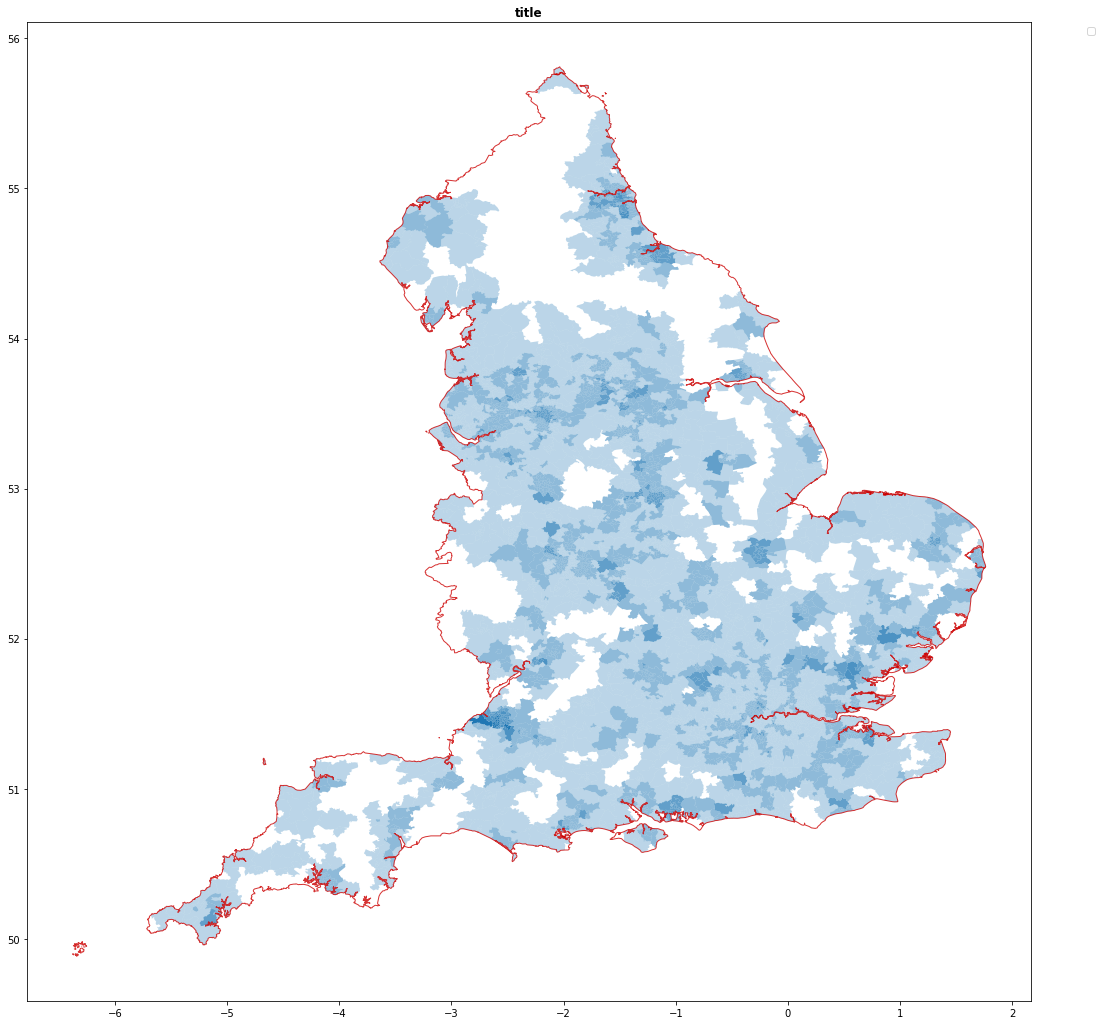

In [57]:
    fig, ax = plt.subplots(figsize=(18,18))
    legend_elements = []
    tract22.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.3)
    tract23.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.5)
    tract24.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract25.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.8)
    tract26.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8), label='MSOAs with Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs Lack of Vaccination Service'))
    plt.gca().set_aspect('auto')
    plt.title('title', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))